<h1>Read Data

In [36]:
%matplotlib inline


In [38]:
#read data from the listing file 

import pandas as pd 
df = pd.read_csv ('listings.csv')
df


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20240913025540,2024-09-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.65
1,5769,https://www.airbnb.com/rooms/5769,20240913025540,2024-09-13,previous scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.70
2,6413,https://www.airbnb.com/rooms/6413,20240913025540,2024-09-13,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.67
3,6448,https://www.airbnb.com/rooms/6448,20240913025540,2024-09-13,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/airflow/Hosti...,14156,...,4.98,4.97,4.88,NaN,t,1,1,0,0,2.05
4,8502,https://www.airbnb.com/rooms/8502,20240913025540,2024-09-13,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.88,4.68,4.62,NaN,f,1,1,0,0,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15239,1243716189846492535,https://www.airbnb.com/rooms/1243716189846492535,20240913025540,2024-09-13,city scrape,King Beds and Backyard (2BD/1BH),Lux King bed suite with a private entrance and...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,562989510,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
15240,1243766578522277492,https://www.airbnb.com/rooms/1243766578522277492,20240913025540,2024-09-13,city scrape,Ultra Luxury Barton Hills/Zilker - Sleeps 16+,Welcome to luxury in Barton Hills! This 5 bed...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,80629472,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
15241,1243796673548135239,https://www.airbnb.com/rooms/1243796673548135239,20240913025540,2024-09-13,city scrape,The Organic Modern Retreat,"Kick back and relax in this calm, stylish space.",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,581955518,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
15242,1243801100970998865,https://www.airbnb.com/rooms/1243801100970998865,20240913025540,2024-09-13,city scrape,New Townhome close to Downtown,Your family will be close to everything when y...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,131335374,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN


In [40]:
#read data from the review file 

import pandas as pd 
df_reviews = pd.read_csv ('reviews.csv')
df_reviews


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...
1,5456,977,2009-03-19,8102,Phil,Highly recommended. Sylvia was extremely helpf...
2,5456,1039,2009-03-22,8241,Galen,A great place to stay in a great city. Sylvia ...
3,5456,1347,2009-04-08,11152,April,Highly recommended! \r<br/>Cute and cozy guest...
4,5456,1491,2009-04-13,12400,Ivonne,"What a great little apartment! It was clean, ..."
...,...,...,...,...,...,...
633191,1234223528652929194,1241387990654800215,2024-09-08,140429084,Lien,"Shawn was a great, responsive host! The back b..."
633192,1234223528652929194,1243569829073013711,2024-09-11,112800383,Robert,"Nicely furnished, with a good tree top view. S..."
633193,1234746289368192591,1242840552647994261,2024-09-10,82486289,Joshua,A truly great place to stay! The hosts were ex...
633194,1234844757874144349,1237067978228147361,2024-09-02,163122238,Diana,We booked this Airbnb last minute after anothe...


<h1> EDA and Data Cleaning 

In [ ]:
df.describe()

In [ ]:
df.price.dtypes

In [ ]:
df_reviews.columns 

In [ ]:
df.columns

In [ ]:
#drop columns 'listing_url', 'scrape_id' , 'last_scraped' , 'source'

df.drop(columns = [ 'scrape_id' , 'last_scraped' , 'source'] , inplace = True )

In [ ]:
df

<B> Load Table into SQL Server

In [ ]:
#load the data into sql server using replace option
import sqlalchemy as sal
engine = sal.create_engine('mssql://DESKTOP-S81UHM2/master?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn=engine.connect()

In [ ]:
#load the listing data into sql server using replace option
df.to_sql('df_listings', con=conn , index=False, if_exists = 'replace')

In [ ]:
#load the review data into sql server using replace option
df_reviews.to_sql('df_reviews', con=conn , index=False, if_exists = 'replace')

<b> Vizualiaton</h1>

In [ ]:
#Correlation between the availability and reviews

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for availability and reviews
df_selected = df[['availability_30', 'availability_60', 'availability_90', 
                  'availability_365', 'number_of_reviews', 'reviews_per_month']]

# Drop rows with missing values in the selected columns
df_selected = df_selected.dropna()

# Calculate correlation matrix
corr_matrix = df_selected.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add titles and labels
plt.title('Availability vs. Reviews Correlation Heatmap')
plt.show()


In [42]:
!pip install textblob
!pip install wordcloud



In [46]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Preprocess text: fill missing comments, lowercase, and remove any non-relevant characters
df_reviews['comments'] = df_reviews['comments'].fillna('').str.lower()

# Function to determine sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df_reviews['sentiment'] = df_reviews['comments'].apply(get_sentiment)

# Separate positive and negative reviews
positive_reviews = " ".join(df_reviews[df_reviews['sentiment'] > 0]['comments'])
negative_reviews = " ".join(df_reviews[df_reviews['sentiment'] < 0]['comments'])

print("Positive Reviews Sample:", positive_reviews[:500])
print("Negative Reviews Sample:", negative_reviews[:500])

Positive Reviews Sample: sylvia is a hostess who is gracious and helpful beyond words! first of all, she wanted to know about our plans and answered all of the questions we had about the city via email before we arrived. she picked us up from the airport and had a handful of maps and magazines about austin. her guest house is spotless, adorably decorated, and complete from soap to movies. the neighborhood is charming, and walking distance to cool spots. (we lucked out because her schedule allowed her to show us around t
<br/>thanks sylvia!! i can't say anything about the hospitality, as i never made it down to texas.  i missed my flight due to winter weather conditions.  sylvia didn't refund any of the cost.   cozy and comfy, just what we needed got in late, but everything was in order for me to ptfo without any trouble. thanks! sehr freundliche gastgeberin, nettes kleines gartenhäuschen, fußläufig (10 min) zum austin convention center the house was a 


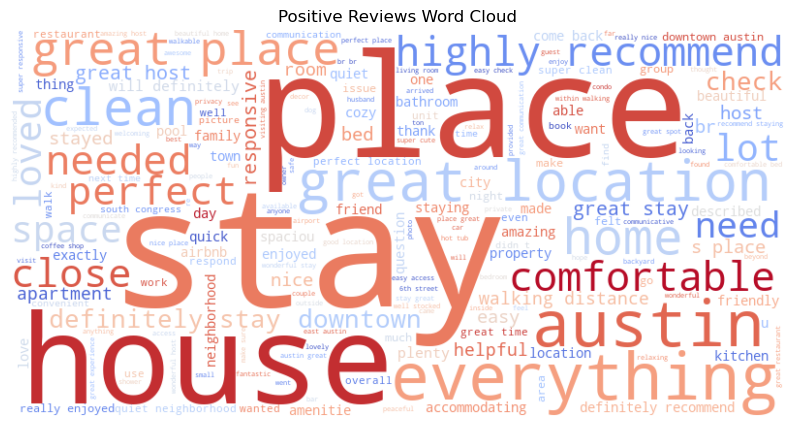

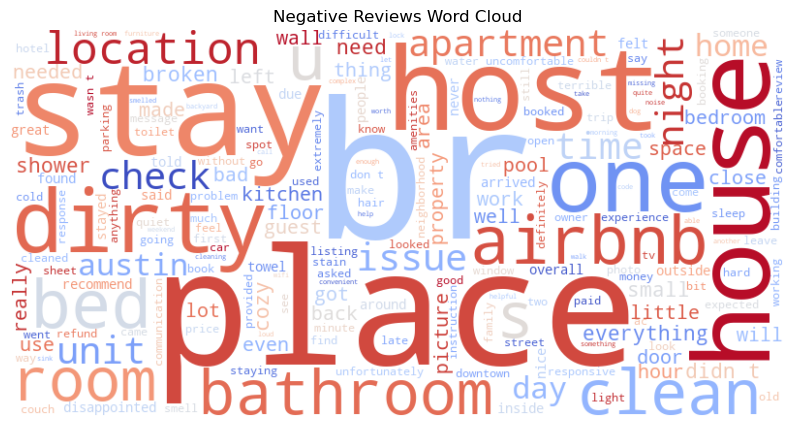

In [48]:
# Generate Word Clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          max_words=200, colormap='coolwarm').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word clouds for positive and negative reviews
plot_wordcloud(positive_reviews, "Positive Reviews Word Cloud")
plot_wordcloud(negative_reviews, "Negative Reviews Word Cloud")
